In [53]:
import sys; sys.path.append("../")
from spatial_regression import LaggedSpatialRegression2
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")
plt.style.use("seaborn-whitegrid")

In [64]:
what = "no_seasonal"
specs = "_bias_log_free_norm_hi_reg"
model = torch.load(f"../outputs/spatial/weights_{what}{specs}.pt")
data = np.load(f"../data/simulation/{what}.npz")

In [65]:
kernel = model.kernel.detach().cpu()
lam, mu = kernel.abs().max(-1)
gam = kernel.norm(dim=-1)
alpha = model.alpha.detach().cpu()

In [66]:
X = data['power_plants']
Y = data["states"]
np.corrcoef(X)

array([[ 1.        ,  0.03734952, -0.02081252],
       [ 0.03734952,  1.        , -0.05278236],
       [-0.02081252, -0.05278236,  1.        ]])

In [67]:
Y_ts = Y[39, 99, :]
np.corrcoef(X[0], Y_ts)

array([[ 1.        , -0.07848548],
       [-0.07848548,  1.        ]])

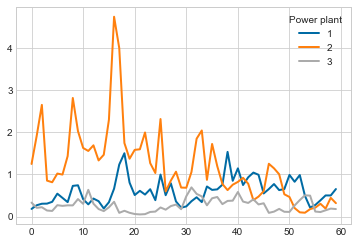

In [68]:
plt.plot(X[0,:], label="1", lw=2)
plt.plot(X[1,:], label="2", lw=2)
plt.plot(X[2,:], label="3", lw=2)
# plt.plot(1000 * Y_ts, label="point with no causal relation")
plt.legend(title="Power plant")
plt.savefig(f"power-plant-emissions-{what}.png", bbox_inches='tight')

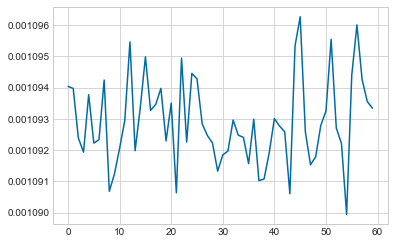

In [59]:
plt.plot(Y_ts)

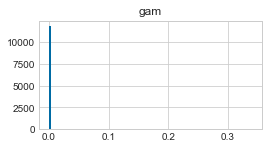

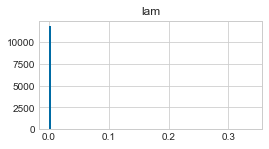

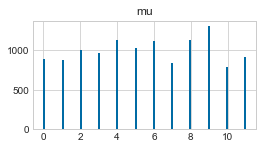

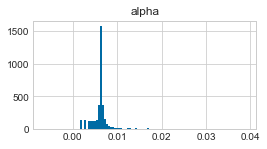

In [60]:
plt.figure(figsize=((4, 2)))
plt.hist(gam.numpy().flatten(), bins=100)
plt.title("gam")
plt.show()

plt.figure(figsize=((4, 2)))
plt.hist(lam.numpy().flatten(), bins=100)
plt.title("lam")
plt.show()

plt.figure(figsize=((4, 2)))
plt.hist(mu.numpy().flatten(), bins=100)
plt.title("mu")
plt.show()

plt.figure(figsize=((4, 2)))
plt.hist(alpha.numpy().flatten(), bins=100)
plt.title("alpha")
plt.show()


In [61]:
locs = data["locs"]
sigs = data["sigs"]
list(zip(locs.tolist(), sigs.round(2)))

[([25, 30], 0.3), ([25, 50], 1.0), ([20, 45], 0.3)]

Let's pick a power plant in the middle

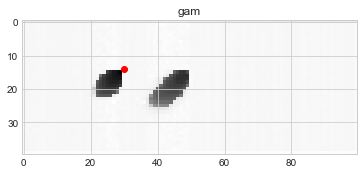

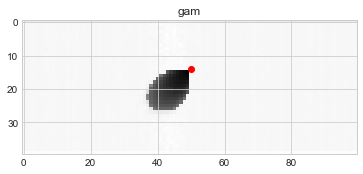

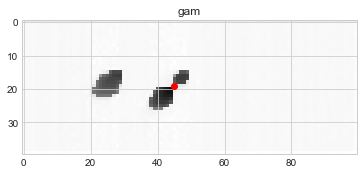

In [62]:
for p in range(3):
    locp = locs[p]
    mu_p = mu[:, :, p].detach().numpy()
    gam_p = gam[:, :, p].detach().numpy()
    lam_p = lam[:, :, p].detach().numpy()
    R, C, P = mu.shape
    ix = list(reversed(range(0, R)))

    plt.figure(figsize=((6, 4)))
    plt.imshow(np.log(gam_p[ix]))
    plt.scatter([locp[1]], [R -1 - locp[0]], c="red")

    plt.title("gam")
    plt.show()

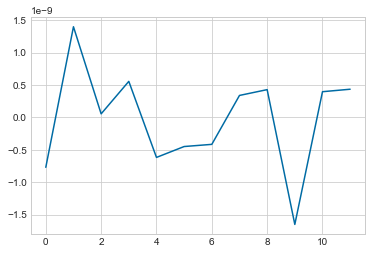

In [63]:
# visualize kernel
d = kernel[20, 50, p].numpy()
plt.plot(d)